In [604]:
import os
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Reading Data 

In [635]:
#Read Data
os.getcwd()
df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [606]:

df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


# Data Description


In [607]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [608]:
#Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [609]:
df.shape

(8760, 14)

In [610]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Explanatory Data Analysis


In [636]:
##Feature Engineering
#Preprocess the datatime column
%timeit pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Date']= pd.to_datetime(df['Date'],dayfirst = True)


2.13 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [637]:
df['Day of week'] = pd.DatetimeIndex(df['Date']).day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day of week'] = pd.DatetimeIndex(df['Date']).day_name()
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of week,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


In [613]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day of week', 'Day', 'Month', 'Year'],
      dtype='object')

# Data Visualization
## Distribution of Dataset

Text(0.5, 1.0, 'Count_Distribution')

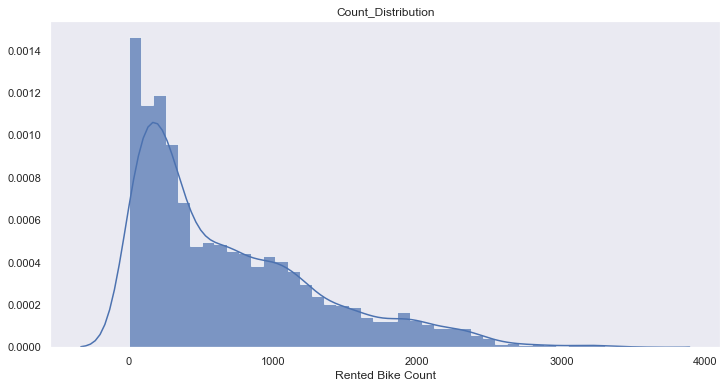

In [615]:
fig = plt.figure(figsize = [12,6])
sns.distplot(df['Rented Bike Count'] , hist_kws = { 'alpha' : 0.7 , 'histtype' : 'stepfilled'})
plt.xlabel('Rented Bike Count')
plt.title('Count_Distribution')


In [616]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day of week', 'Day', 'Month', 'Year'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

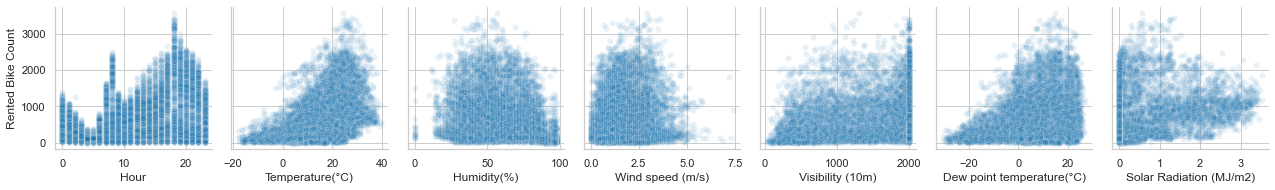

In [648]:
fig = plt.figure(figsize = [10,8])
sns.set(style = 'whitegrid', palette = 'tab10')
sns.pairplot(df, x_vars = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)'],
             y_vars = ['Rented Bike Count'] , kind = 'scatter',
             plot_kws={'alpha': .1})


<Figure size 720x576 with 0 Axes>

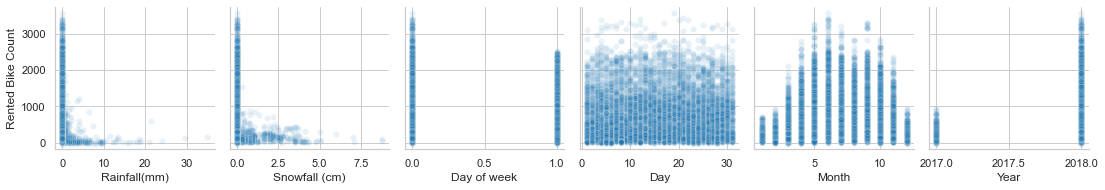

In [651]:
fig = plt.figure(figsize = [10,8])
sns.set(style = 'whitegrid', palette = 'tab10')
sns.pairplot(df, x_vars = ['Rainfall(mm)', 'Snowfall (cm)', 'Day of week', 'Day', 'Month', 'Year'],
             y_vars = ['Rented Bike Count'] , kind = 'scatter',
             plot_kws={'alpha': .1})



In [618]:
count_df

,Date,Day of week,Year,Month,Rented Bike Count
0,2017-12-01,Friday,2017,12,9539
1,2017-12-02,Saturday,2017,12,8523
2,2017-12-03,Sunday,2017,12,7222
3,2017-12-04,Monday,2017,12,8729
4,2017-12-05,Tuesday,2017,12,8307
...,...,...,...,...,...
360,2018-11-26,Monday,2018,11,17162
361,2018-11-27,Tuesday,2018,11,16282
362,2018-11-28,Wednesday,2018,11,16524
363,2018-11-29,Thursday,2018,11,16423


In [619]:
count_month

,Date,Month,Day of week,Rented Bike Count
0,2017-12-01,12,Friday,9539
1,2017-12-02,12,Saturday,8523
2,2017-12-03,12,Sunday,7222
3,2017-12-04,12,Monday,8729
4,2017-12-05,12,Tuesday,8307
...,...,...,...,...
360,2018-11-26,11,Monday,17162
361,2018-11-27,11,Tuesday,16282
362,2018-11-28,11,Wednesday,16524
363,2018-11-29,11,Thursday,16423


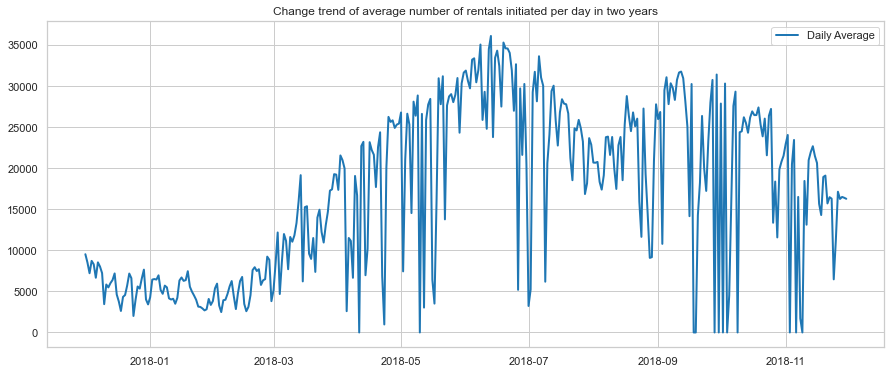

In [620]:
sns.set(style = 'whitegrid', palette = 'tab10')
count_df = df.groupby(['Date', 'Day of week'], as_index = False).agg({'Year': 'mean',
                                                                          'Month': 'mean',
                                                                              'Rented Bike Count': 'sum'})

fig = plt.figure(figsize = [15,6])
ax = fig.add_subplot(1,1,1)
plt.plot(count_df['Date'], count_df['Rented Bike Count'], linewidth = 2, label = 'Daily Average')
ax.set_title('Change trend of average number of rentals initiated per day in two years')
ax.legend()


[Text(0, 0.5, 'Rented Bike Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Rented Bike Count By Hour Of The Day Across Weekdays'),
 None]

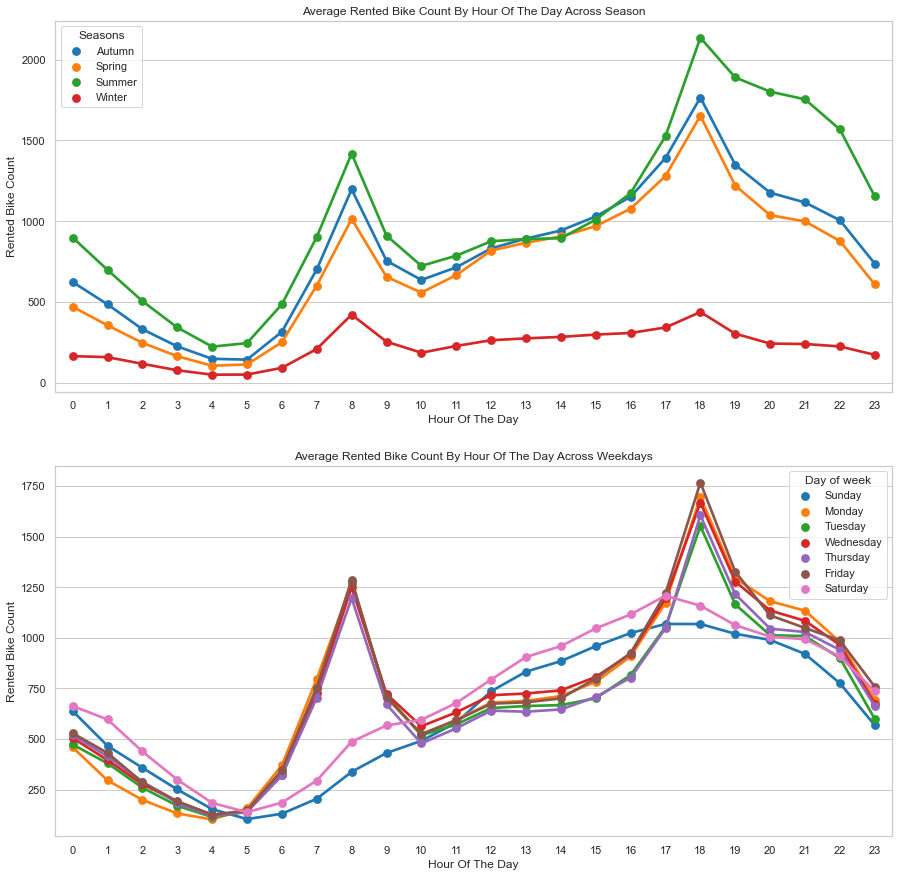

<Figure size 1080x1800 with 0 Axes>

In [621]:
fig,(ax1, ax2)= plt.subplots(nrows = 2)
fig = plt.figure(figsize = [15,25])

hourAggregated = pd.DataFrame(df.groupby(["Hour","Seasons"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x = hourAggregated["Hour"], y = hourAggregated["Rented Bike Count"],hue = hourAggregated["Seasons"], data = hourAggregated, join = True,ax = ax1)
ax1.set(xlabel = 'Hour Of The Day', ylabel ='Rented Bike Count',title = "Average Rented Bike Count By Hour Of The Day Across Season",label ='big')

hourAggregated = pd.DataFrame(df.groupby(["Hour","Day of week"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x = hourAggregated["Hour"], y = hourAggregated["Rented Bike Count"],hue = hourAggregated["Day of week"],hue_order = hueOrder, data = hourAggregated, join=True,ax=ax2)
ax2.set(xlabel = 'Hour Of The Day', ylabel ='Rented Bike Count',title = "Average Rented Bike Count By Hour Of The Day Across Weekdays",label ='big')

<Figure size 1080x1080 with 0 Axes>

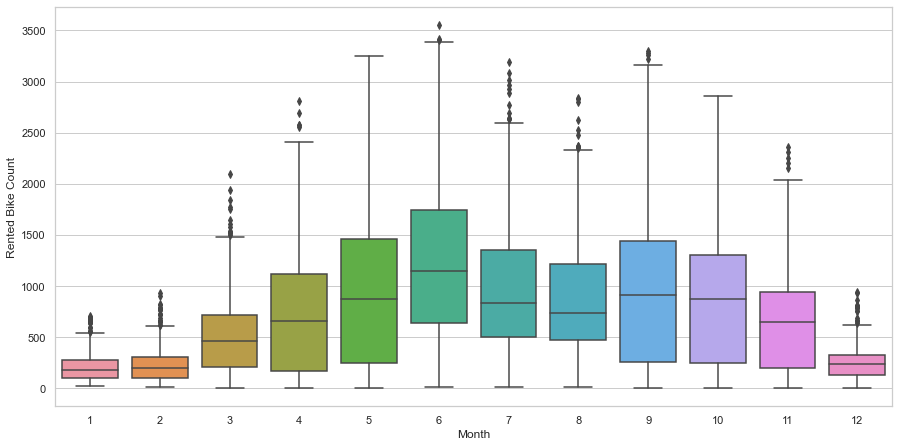

In [622]:
fig = plt.figure(1)
fig = plt.subplots(figsize = [15,25])

ax = plt.subplot(3,1,1)
ax = sns.boxplot(x = 'Month',y = 'Rented Bike Count',data=df)

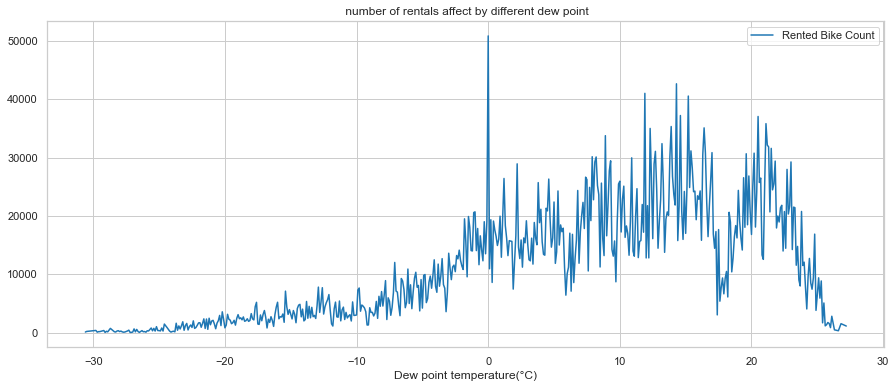

In [623]:
Dew_count = df.groupby('Dew point temperature(°C)')[['Rented Bike Count']].sum()
Dew_count.plot(figsize = (15,6),title = ' number of rentals affect by different dew point')

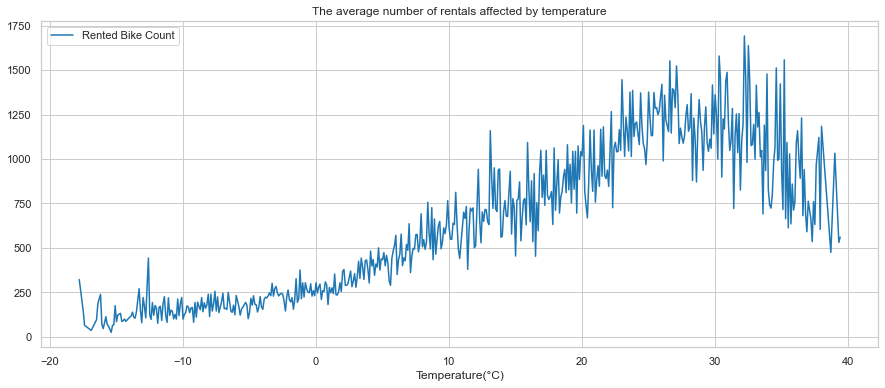

In [624]:
temp_rentals = df.groupby('Temperature(°C)', as_index=True).agg({'Rented Bike Count':'mean'})
temp_rentals.plot(figsize = (15,6) ,title = 'The average number of rentals affected by temperature')

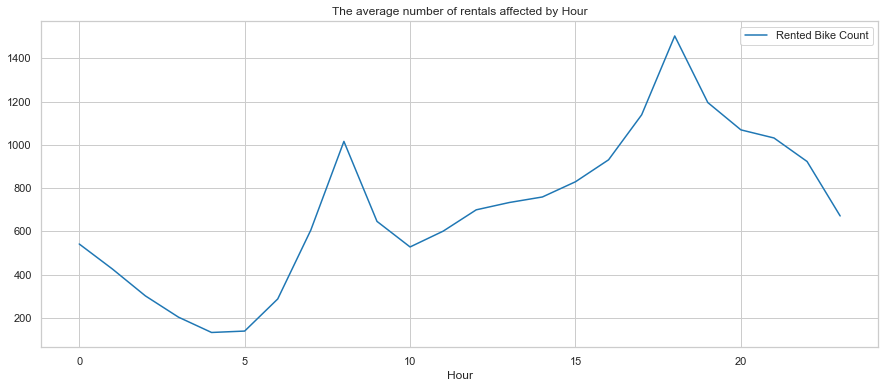

In [625]:
temp_rentals = df.groupby('Hour', as_index=True).agg({'Rented Bike Count':'mean'})
temp_rentals.plot(figsize = (15,6) ,title = 'The average number of rentals affected by Hour')

<Figure size 1080x1080 with 0 Axes>

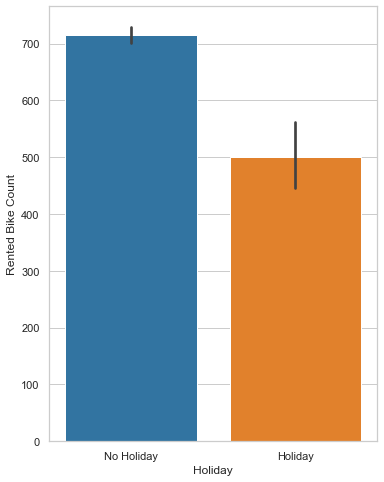

In [626]:
fig=plt.figure(1)
fig=plt.subplots(figsize=[20,8])
ax1=plt.subplot(1,3,1)
ax3=sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

In [627]:
#Data cleaning: Turn categorical variables into binary variables. 
cleanup = {"Holiday": {"No Holiday": 0, "Holiday": 1 },
            "Functioning Day": {"Yes": 1, "No": 0 },
            "Day of week": {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 1, "Sunday": 1 }}
#Drop unnecessary variables and samples with 0 target value.
df = df.drop(columns=['Date', 'Functioning Day']) 
index_names = df[ df['Rented Bike Count'] == 0 ].index
df.drop(index_names, inplace = True)
df.head(20)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of week,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Friday,1,12,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Friday,1,12,2017


In [628]:
#Correlation Matrix
corrdf = df.corr()
corrdf

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611,0.007644,0.167186,0.232004
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082,-0.001140,0.001048,0.000315
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746,0.014461,0.213947,0.377003
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127,-0.024615,0.139090,0.035188
Wind speed (m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789,-0.033204,-0.154149,-0.003568
Visibility (10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860,-0.115933,0.063474,0.051802
Dew point temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760,0.000784,0.239406,0.334985
Solar Radiation (MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380,-0.001724,-0.028675,0.130141
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604,0.000455,0.010912,0.028228
Snowfall (cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000,0.101834,0.058410,-0.205030


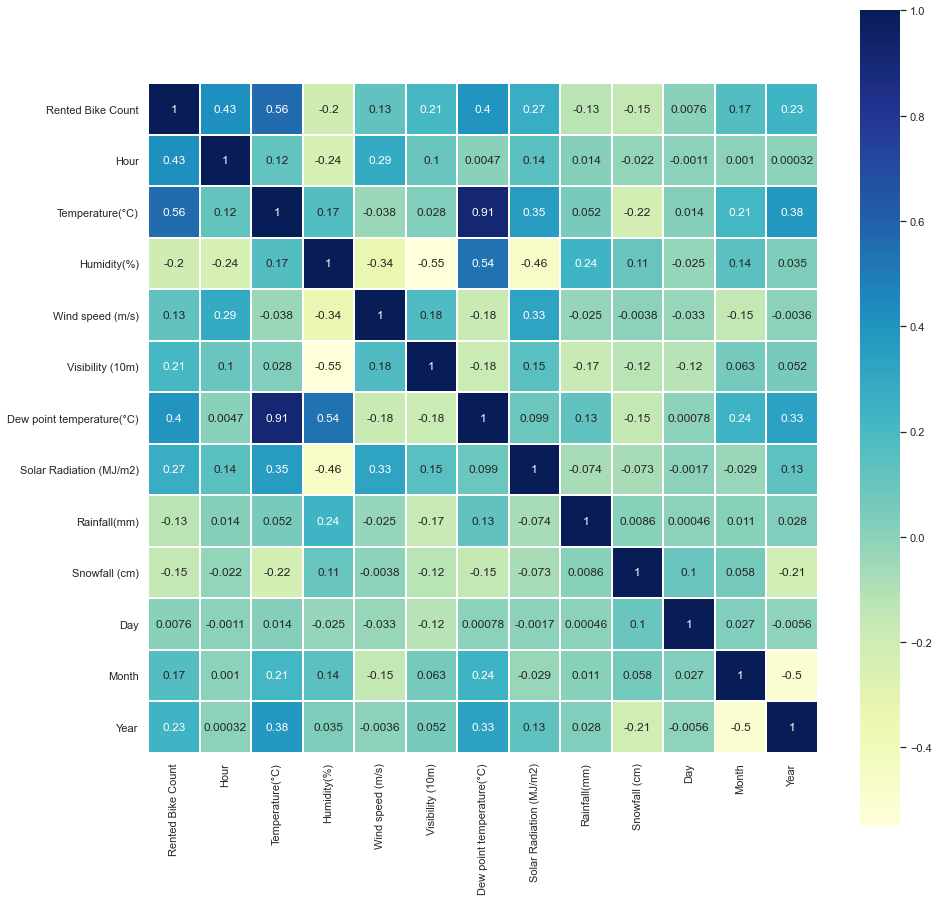

In [629]:
corr_df = df.corr()
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(corr_df,ax=ax1,vmax=1,square=True ,annot = True,cmap='YlGnBu',linewidths=.8)
plt.show()

In [630]:
corrdf['Rented Bike Count'].sort_values(ascending = False)

Rented Bike Count            1.000000
Temperature(°C)              0.562740
Hour                         0.425256
Dew point temperature(°C)    0.400263
Solar Radiation (MJ/m2)      0.273862
Year                         0.232004
Visibility (10m)             0.212323
Month                        0.167186
Wind speed (m/s)             0.125022
Day                          0.007644
Rainfall(mm)                -0.128626
Snowfall (cm)               -0.151611
Humidity(%)                 -0.201973
Name: Rented Bike Count, dtype: float64

In [631]:
# #Feature Selection
# df1= df[['Rented Bike Count', 'Hour','Temperature(°C)','Dew point temperature(°C)']]
# df1.head(10)

,Rented Bike Count,Hour,Temperature(°C),Dew point temperature(°C)
0,254,0,-5.2,-17.6
1,204,1,-5.5,-17.6
2,173,2,-6.0,-17.7
3,107,3,-6.2,-17.6
4,78,4,-6.0,-18.6
5,100,5,-6.4,-18.7
6,181,6,-6.6,-19.5
7,460,7,-7.4,-19.3
8,930,8,-7.6,-19.8
9,490,9,-6.5,-22.4


In [638]:
#Data cleaning: Turn categorical variables into binary variables. 
cleanup = {"Holiday": {"No Holiday": 0, "Holiday": 1 },
            "Functioning Day": {"Yes": 1, "No": 0 },
            "Day of week": {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 1, "Sunday": 1 }}
df = df.replace(cleanup)
df = pd.get_dummies(df, columns=["Seasons"], prefix=["Season"]) #convert to one-hot

#Drop unnecessary variables and samples with 0 target value.
df = df.drop(columns=['Date', 'Functioning Day']) 
index_names = df[ df['Rented Bike Count'] == 0 ].index
df.drop(index_names, inplace = True)
df.head(20)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day of week,Day,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,1,12,2017,0,0,0,1
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,1,12,2017,0,0,0,1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,1,12,2017,0,0,0,1


In [639]:
class LinearRegression:
    def __init__(self, X, y, learningrate, tolerance, lamb, maxIteration = 50000, error = 'rmse', gd = False, regularization = False, 
                 sgd = False, batch_size = 1):
        self.X = X
        self.y = y
        self.learningrate = learningrate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.lamb = lamb
        self.error = error
        self.gd = gd
        self.regularization = regularization
        self.sgd = sgd
        self.batch_size = batch_size
    
    def trainTestSplit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
        
        return X_train, X_test, y_train, y_test
    
    def addX0(self, X):
        """
        @X: numpy matrix, dataset
        @does: add a bias term to the data
        @return: numpy matrix
        """
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def normalize(self, X):
        """
        @X:numpy matrix, dataset
        @does: normalize the data
        @return: numpy matrix, array, array
        """
        
        mean = np.mean(X, 0)
        std = np.std(X, 0)
        X_norm = (X - mean) / std
        X_norm = self.addX0(X_norm)
        
        return X_norm, mean, std
    
    def normalizeTestData(self, X, trainMean, trainStd):
        """
        @X:numpy matrix, dataset
        @does: normalize the test data
        @return: numpy matrix
        """
        
        X_norm = (X - trainMean) / trainStd
        X_norm = self.addX0(X_norm)
        
        return X_norm
    
    def rank(seld, X, eps = 1e-12):
        u, S, vh = np.linalg.svd(X)
        return len([x for x in S if abs(x) > eps])
    
    def checkMatrix(self, X):
        x_rank = self.rank(X)
        if x_rank == min(X.shape[0], X.shape[1]):
            self.fullRank = True
            print('Matrix is full rank')
        else:
            self.fullRank = False
            print('Matrix is not full rank')
    
    def checkInvertibility(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print('The matrix is low rank')
        else:
            self.lowRank = False
            print('The matrix is not low rank')
            
    def closedFormSolution(self, X, y):
        """
        @X: numpy matrix, dataset
        @y: numpy array, target value
        @does: solve the regression using closed form solution |X^T.X|^-1.X^T.y with or without regularization term
        @returns numpy array
        """
        IdentitySize = X.shape[1]
        IdentityMatrix= np.zeros((X.shape[1], X.shape[1]))
        np.fill_diagonal(IdentityMatrix, 1)
        IdentityMatrix[0,0] = 0
        if self.regularization == False:
            return np.linalg.solve(X.T.dot(X), X.T.dot(y))  
        return np.linalg.solve(X.T.dot(X) + self.lamb * IdentityMatrix, X.T.dot(y))
    
    def predict(self, X):
        return X.dot(self.w)
    
    def sse(self, X, y):
        y_hat = self.predict(X)
        return ((y_hat - y)**2).sum() #||X^TQ - y||2
    
    def sst(self, X, y):
        return np.sum((y - np.mean(y)) ** 2)
     
    def rmse(self, X, y):
        return math.sqrt(self.sse(X, y)/ y.size)
    
    def a(self, X, y):
        y_hat = self.predict(X)
        return abs(y_hat - y).sum()
    
    def mae(self, X, y):
        return self.a(X, y)/ y.size
    
    def r2(self, X, y):
        return 1 - self.sse(X,y) / self.sst(X,y)
    
    def costFunction(self, X, y):
        return self.sse(X, y) / 2
    
    def costDeriviative(self, X, y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X) if self.regularization == False else (y_hat - y).dot(X) + self.lamb * self.w
         
    
    def gradientDescent(self, X, y):
        """
        @X: numpy matrix, dataset
        @y: numpy array, target value
        @does: solve the regression using gradient descent with or without regularization term
        @returns numpy array
        """
        
        error_sequences = []
        
        last_error = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningrate * self.costDeriviative(X, y)
            if self.error == 'rmse':
                current_error = self.rmse(X, y)
            else:
                current_error = self.sse(X, y)
                
            diff = last_error - current_error
            last_error = current_error
            
            if diff < self.tolerance:
                print("The model stopped - no further improvment")
                break
                
        return
    
    
    
    def stochasticGD(self, X, y):
        """
        @X: numpy matrix, dataset
        @y: numpy array, target value
        @does: solve the regression using stochastic gradient descent with or without regularization term
        @returns numpy array
        """
        
        error_sequences = []
        
        last_error = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            for start in range(0, X.shape[0], self.batch_size):
                X_batch = X[start:start + self.batch_size, :]
                y_batch = y[start:start + self.batch_size,]
                self.w = self.w - self.learningrate * self.costDeriviative(X_batch, y_batch)
                if self.error == 'rmse':
                    current_error = self.rmse(X_batch, y_batch)
                else:
                    current_error = self.sse(X_batch, y_batch)
                
                diff = last_error - current_error
                last_error = current_error
                if diff < self.tolerance:
                    break
        return   
        
    
    def trainModel(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit(self.X, self.y)
        
        #Normalize the data
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std)
        
        self.checkMatrix(self.X_train)
        self.checkInvertibility(self.X_train)
        
        if self.fullRank and not self.lowRank and self.X_train.shape[0] < 10000 and not self.gd and not self.sgd:
            self.w = self.closedFormSolution(self.X_train, self.y_train)
        #normal equation
            
        elif self.gd and not self.sgd:
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.gradientDescent(self.X_train, self.y_train)
        #Gradient descent 
        
        elif self.sgd and not self.gd:
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.stochasticGD(self.X_train, self.y_train)
        #Stochastic gradient descent
        
        print(self.w)
        
        if self.error == 'rmse':
            print("Below is RMSE:")
            print(self.rmse(self.X_test, self.y_test))
            print("Below is R-Square:")
            print(self.r2(self.X_test, self.y_test))
            print("Below is MAE:")
            print(self.mae(self.X_test, self.y_test))
            return self.predict(self.X_test)
        else:
            print("Below is SSE:")
            print(self.sse(self.X_test, self.y_test))
            
            
    def outputpreds(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit(self.X, self.y)
        
        #Normalize the data
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std)
        return self.predict(self.X_test)
    
    def plot(self):
        a = plt.axes(aspect='equal')
        plt.scatter(self.y_test, self.predict(self.X_test), s=2)
        plt.xlabel("True value")
        plt.ylabel('Prediction')
        plt.plot([0,3000], [0,3000], c="red")
        plt.rcParams["figure.figsize"] = (15,15)
        plt.show()
        plt.close()

In [640]:
df_regression = LinearRegression(df.values[:,1:], df.values[:, 0],
                             learningrate = 0.0000005,
                             tolerance = 0.000000001,
                             lamb = 1,
                             gd = False,
                             error = 'rmse',
                             regularization = True,
                             sgd = True, 
                             batch_size = 400)

In [641]:
df_regression.trainModel()

  6%|▌         | 2814/50000 [00:00<00:03, 13821.54it/s]

Matrix is not full rank
The matrix is not low rank


100%|██████████| 50000/50000 [00:03<00:00, 14843.47it/s]

[ 725.56239127  187.6193585   249.3206576  -241.1734928    17.23548469
    2.28408798  131.81655463  -86.18556906  -68.56748558   32.25233046
  -28.27922829  -38.74742209    6.85426227  -32.05924496  -42.5434872
   95.1220469     6.51843845   -6.72023464  -90.8642294 ]
Below is RMSE:
430.93224571607834
Below is R-Square:
0.541213822482307
Below is MAE:
323.0130437381575


array([ 179.26905171,  985.82556723,  584.43930551, ..., 1159.96977552,
        584.71942517,  706.33991213])

In [642]:
preds = df_regression.outputpreds()

In [643]:
preds

array([ 179.26905171,  985.82556723,  584.43930551, ..., 1159.96977552,
        584.71942517,  706.33991213])

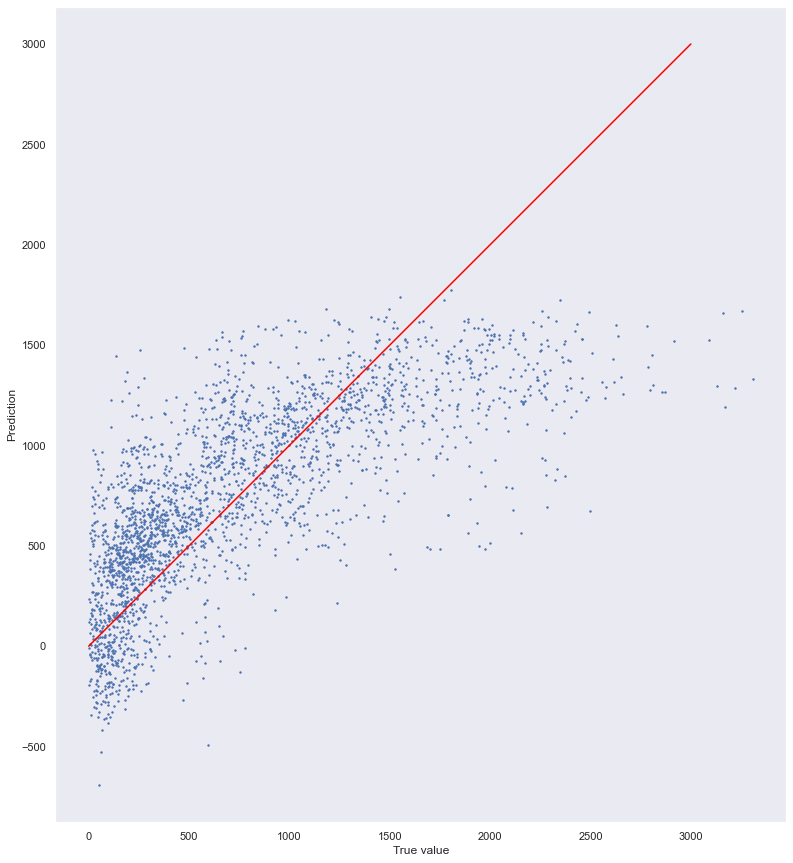

In [644]:
#Predictions vs Ture Value Scatter plot
df_regression.plot()